<h1>Model Evalution With MLE</h1>

In [5]:
%%capture
import import_ipynb
import matplotlib.pyplot as plt
from language_model import *
%matplolib inline

<h2>Wikipedia articles as corpus for language model</h2>

<p> Calling <code>read_filename()</code> function with directory <code>'./wikipedia/'</code> containing 
wikipedia articles and with other argument denoting number of articles to fetch from the directory.</p>

In [9]:
filenames=read_filename('./wikipedia/', 10)
sents=create_tokens(filenames)
_, test_corpus=train_test_split(sents)

<h3>With Unigram Model</h3>

In [10]:
wiki_articles=[]
perp_1=[]
for i in range(10,200,10):
    filenames=read_filename('./wikipedia/', i)
    sents=create_tokens(filenames)
    train_corpus, _=train_test_split(sents)
    fd_1gram=ngram_freq_dist(train_corpus, ngram=1)
    cpd_1gram=nltk.MLEProbDist(fd_1gram)
    perp_1.append(perplexity(cpd_1gram, test_corpus, 1))
    wiki_articles.append(i)

Text(0, 0.5, 'Perplexity')

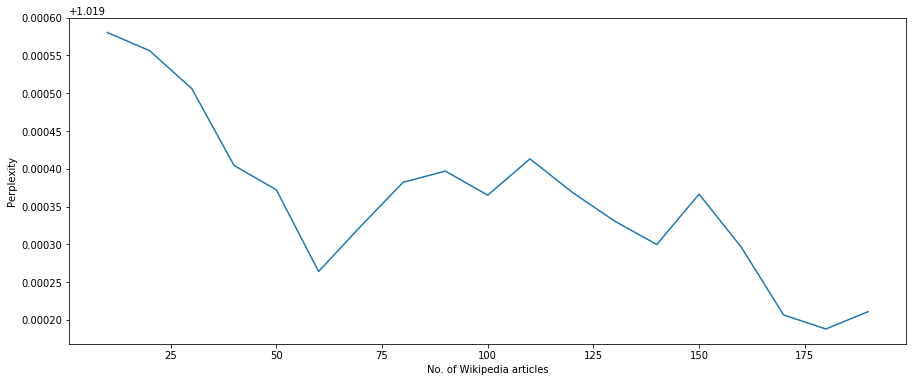

In [11]:
plt.plot(wiki_articles, perp_1)
plt.xlabel('No. of Wikipedia articles')
plt.ylabel('Unigram Perplexity')

<h3>With Bigram Model</h3>

In [15]:
filenames=read_filename('./wikipedia/', 10)
sents=create_tokens(filenames)
_, test_corpus=train_test_split(sents)

In [23]:
wiki_articles=[]
perp_1=[]
for i in range(10,200,10):
    filenames=read_filename('./wikipedia/', i)
    sents=create_tokens(filenames)
    train_corpus, _=train_test_split(sents)
    cfd_2gram=ngram_freq_dist(train_corpus, ngram=2) #conditional frequency distribution for bigrams
    cpd_2gram = nltk.ConditionalProbDist(cfd_2gram, nltk.MLEProbDist) # conditional probality distribution for bigrams
    perp_1.append(perplexity(cpd_2gram, test_corpus, 2))
    wiki_articles.append(i)

Text(0, 0.5, 'Bigram Perplexity')

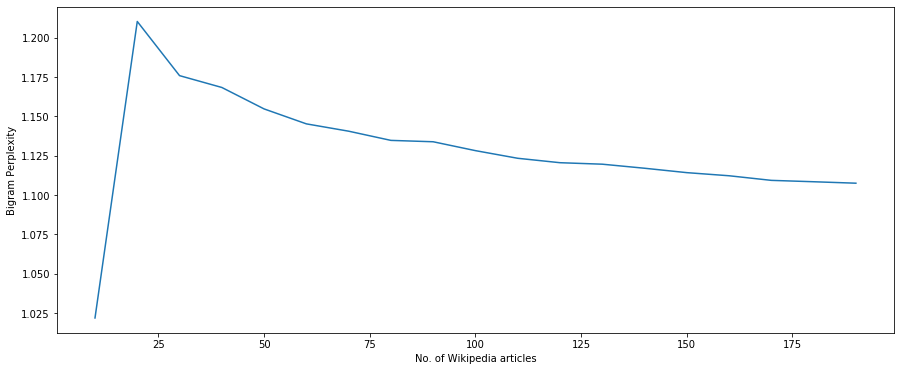

In [24]:
plt.plot(wiki_articles, perp_1)
plt.xlabel('No. of Wikipedia articles')
plt.ylabel('Bigram Perplexity')

<h3>Cross Valiadtion with Brown Corpus Using Bigram Model</h3>

In [27]:
text=nltk_brown_corpus('news')
sents=create_tokens(text)
per=[]
for train_corpus, test_corpus in cross_validation(sents):
    cfd_2gram=ngram_freq_dist(train_corpus, ngram=2)
    cpd_2gram = nltk.ConditionalProbDist(cfd_2gram, nltk.MLEProbDist)
    per.append(perplexity(cpd_2gram, test_corpus, 2))
print(sum(per)/len(per))

1.0539811400924046


In [28]:
len(sents)

128

In [29]:
all_categories_text=brown_corpus_categories_text()
sents=create_tokens(all_categories_text)
per=[]
for train_corpus, test_corpus in cross_validation(sents, 5):
    cfd_2gram=ngram_freq_dist(train_corpus, ngram=2)
    cpd_2gram = nltk.ConditionalProbDist(cfd_2gram, nltk.MLEProbDist)
    per.append(perplexity(cpd_2gram, test_corpus, 2))
print(sum(per)/len(per))

1.069813838395881


In [30]:
len(sents)

876